In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
from scipy import stats
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpl_patches
from scipy.stats import spearmanr
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec

In [5]:
df=pd.read_table('FigS27.csv',sep='\t')
df.head()

,Sample,Population,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn,NRAMP1copy
0,F1-3,Fogo,69.3785,34891.8560,0.0460,0.0670,19.4170,53.7945,41462.2695,1.0850,...,0.512,407.6275,0.1045,12013.0145,0.5970,8.6050,12060.8540,37.4405,83.3990,2.696935
1,F10-1-3,Fogo,60.3190,28719.3150,0.0600,0.0570,18.4260,45.7800,50857.0560,0.9110,...,0.402,235.0170,0.0960,12359.4510,0.5460,10.8920,11155.8210,19.5950,69.2280,1.857687
2,F10-10-101,Fogo,69.0215,30219.2825,0.2330,0.0725,20.2950,57.7815,50361.2655,1.2305,...,0.443,622.5595,0.2585,12082.5130,1.0220,8.9625,10828.2425,22.6110,163.6395,3.178430
3,F10-10-102,Fogo,63.0260,26482.1300,0.1180,0.0750,16.6880,46.8080,51809.7050,1.1780,...,0.369,431.2280,0.1950,12218.5130,1.0220,10.6000,11496.3600,19.7110,84.4750,3.012510
4,F10-10-201,Fogo,68.0610,30416.6540,0.1105,0.0695,19.3895,46.6130,52479.0660,1.0780,...,0.370,497.8530,0.1115,11526.1050,1.0925,10.1355,10861.7290,21.3835,80.1305,2.900805


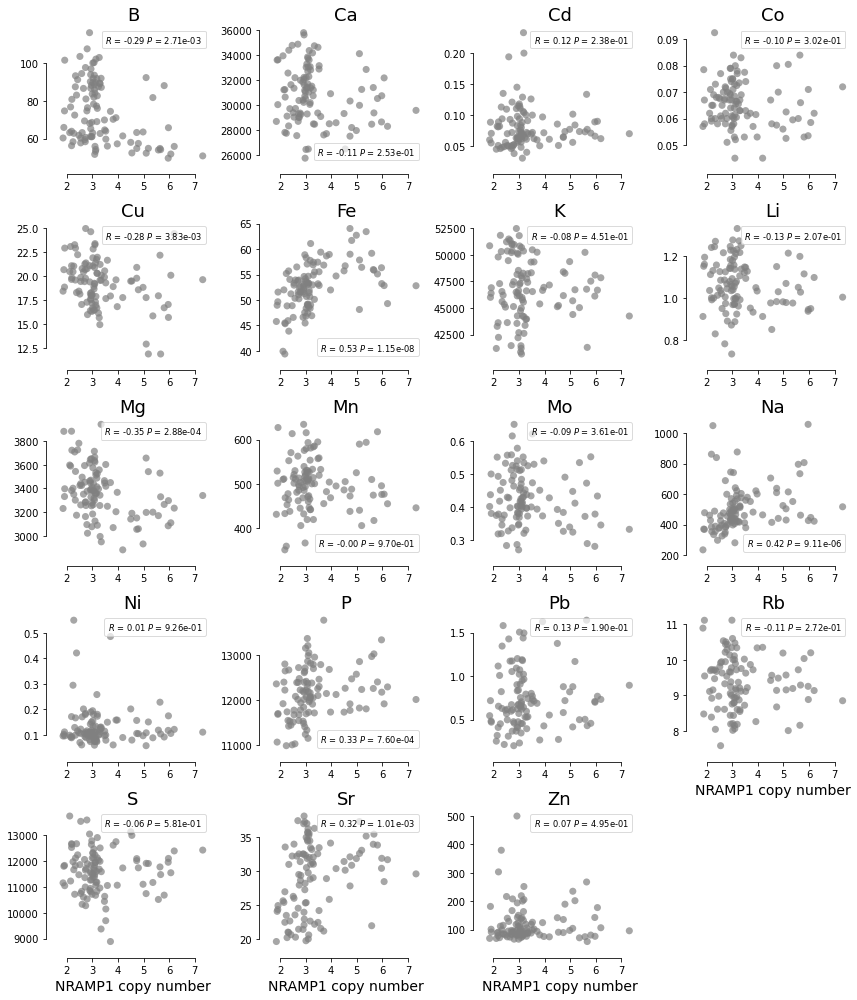

In [7]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
elements = ['B','Ca','Cd','Co',
            'Cu','Fe','K','Li','Mg',
            'Mn','Mo','Na','Ni','P',
            'Pb','Rb','S','Sr','Zn']
def plots(element,idx1,idx2):
    sns.scatterplot(x='NRAMP1copy',
                    y=element,
                    color='grey',
                    edgecolor='none',
                    marker='o',
                    s=50,
                    alpha=0.7,
                    data=df,
                    ax=axes[idx1,idx2])
    
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2
    labels = []
    r,p = spearmanr(df[element],df['NRAMP1copy'])
    labels.append(r"$\itR$ = {:.2f} $P$ = {:.2e}".format(r,p))
    axes[idx1,idx2].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel('')
    axes[idx1,idx2].set_title(element,fontsize=18)
    axes[idx1,idx2].xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    
fig,axes = plt.subplots(5,4,sharey=False,figsize=(12,14))
a,b=0,0
for index in range(len(elements)):
    if index % 4 == 0:
        if index == 0:
            plots(elements[index],a,b)
            b+=1
        elif index == 16:
            a+=1
            b=0
            plots(elements[index],a,b)
            axes[a,b].set_xlabel('NRAMP1 copy number',fontsize=14)
            b+=1
        else:
            a+=1
            b=0
            plots(elements[index],a,b)
            b+=1
    elif index == 15: 
        plots(elements[index],a,b)
        axes[a,b].set_xlabel('NRAMP1 copy number',fontsize=14)
        b+=1
    elif index > 15:
            if index == 18:
                plots(elements[index],a,b)
                axes[a,b].set_xlabel('NRAMP1 copy number',fontsize=14)
                axes[a,b+1].axis('off')
            else:  
                plots(elements[index],a,b)
                axes[a,b].set_xlabel('NRAMP1 copy number',fontsize=14)
                b+=1
    else:
        plots(elements[index],a,b)
        b+=1
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("FigS27.png", format="png",bbox_inches="tight",facecolor="w",dpi=800)